In [1]:
from pandas import DataFrame
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import datetime as dt
import seaborn as sns
from mpl_toolkits import mplot3d

clusters = {}
centroids = []



# =================
# HELPER FUNCTIONS
# =================

def StandardScaler(series):
    """
    Performs Z-score normalisation
    
    Parameters
    -----------
    series: pd.core.series.Series
    
    
    Returns
    --------
    z: pd.core.series.Series
    Normalised measures
    """
    if type(series) == pd.core.series.Series:
        mean = series.mean()
        std = series.std()
        z = (series - mean)/std
        
    return z


def compute_centroids(vecOfVectors):
    """
    Calculates the centroid of a cluster
    
    Parameters
    -----------
    vecOfVectors: ndarray
    Array of points
    
    
    Returns
    -------
    Mean of the points
    """
    vectorArray = np.array(vecOfVectors)
    
    return np.round(np.mean(vectorArray, axis=0), 2)



def get_cluster_number(vector):
    """
    Find the cluster that an observation belongs to
    
    Parameters
    ----------
    vector : ndarray
    
    Returns
    -------
    The cluster number of a point
    
    """
    global centroids
    
    distances = np.sqrt(np.sum((np.array(vector) - centroids)**2, axis=1))
    
    # get the cluster number
    minimum_distance = min(distances)
    
    
    return distances.tolist().index(minimum_distance) + 1



def kMeans(data, k, max_iterations=500):
    
    """
    Performs K-means clustering.
    
    Parameters
    ----------
    data : ndarray or dataframe
    
    """
    global clusters
    global centroids

    

    
    for i in range(max_iterations):
        try:
            if len(centroids) == 0:
                random_numbers = list(set((random.randint(1, data.shape[0]) for i in range(10))))[:k]
                centroids = [data.iloc[i].tolist() for i in random_numbers]
        except Exception as e:
            print(e)
            print("Please import your CSV data")
            return


        myCentroids = []

        # initialise the clusters
        for i in range(np.array(centroids).shape[0]):
            clusters[i + 1] = []

        # for each point, find the cluster it belongs to
        for i in range(data.shape[0]):
            cluster_number = get_cluster_number(np.array(data.iloc[i]))

            # add it to the clusters        
            clusters[cluster_number].append(list(data.iloc[i])) 

        # update the centroids after cluster assignment   
        for i in clusters.keys():
            myCentroids.append(compute_centroids(clusters[i]).tolist())

        # stopping condition
        if(myCentroids == centroids):
            break;
        

        centroids = myCentroids

    plot_graph()
    
    
    
def plot_graph():
    """Show clusters"""

    if (np.array(centroids).shape[1] == 3):    
        ax = plt.axes(projection="3d")
        for i, key in enumerate(clusters.keys()):
            cluster = np.array(clusters.get(key))
            ax.scatter3D(cluster[:, 0], cluster[:, 1], cluster[:, 2])
            
            # Plot the centroids
            ax.scatter3D(np.array(centroids)[i, 0], np.array(centroids)[i, 1], np.array(centroids)[i, 2], marker="x", s = 150)
            ax.set_title("K-means clustering in action")
        

        plt.show()
        return;
        
    for i, key in enumerate(clusters.keys()):
        cluster = np.array(clusters.get(key))
        plt.scatter(cluster[:, 0], cluster[:, 1])
        plt.scatter(np.array(centroids)[i, 0], np.array(centroids)[i, 1], marker="x", s=20)
        plt.title("K-Means Clustering in Action")

    plt.show()


<br/>

## K-Means Clustering and RFM Analysis

In [2]:
retail_df = pd.read_csv("OnlineRetail.csv", header=0)

retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


<br/>

In [3]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<br/>

## Data Cleaning

In [4]:
round((retail_df.isnull().sum()/retail_df.shape[0])*100, 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [5]:
# removing all rows with null values
retail_df = retail_df.dropna()
retail_df.shape

(406829, 8)

In [6]:
# the amount spent on each product
retail_df['amount'] = retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


<br/>

## Prepare the data for modelling

In [7]:
# amount spent per customer
monetary = retail_df.groupby('CustomerID')['amount'].sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


<br/>

In [8]:
# frequency
frequency = retail_df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns = ["CustomerID", 'frequency']
frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


<br/>

In [9]:
# recency
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='%d-%m-%Y %H:%M')

retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [10]:
# get the most recent date 
most_recent = max(retail_df['InvoiceDate'])
most_recent

Timestamp('2011-12-09 12:50:00')

In [11]:
# compute the diff
retail_df['diff'] = most_recent - retail_df['InvoiceDate']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [12]:
# recency
last_purchase = retail_df.groupby('CustomerID')['diff'].min()
last_purchase = last_purchase.reset_index()
last_purchase.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [13]:
# merge 
grouped_df = monetary.merge(frequency).merge(last_purchase)
grouped_df.head()

,CustomerID,amount,frequency,diff
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [14]:
grouped_df.columns = ['Customer', 'Amount', 'Frequency', 'Recency']

In [15]:
# Number of days
grouped_df['Recency'] = grouped_df['Recency'].dt.days
grouped_df.head()

,Customer,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


## Visualisation

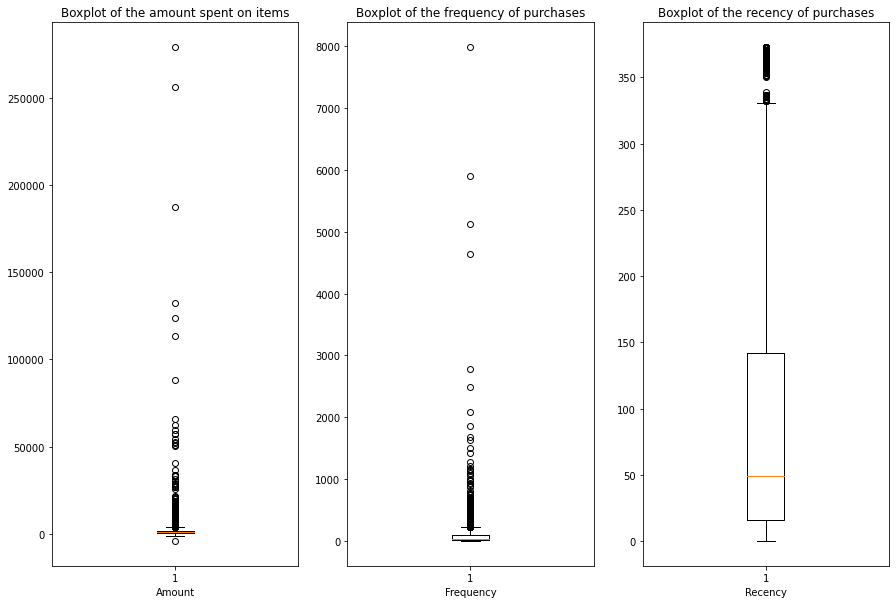

In [16]:
figure, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].boxplot(grouped_df['Amount'])
ax[0].set_title("Boxplot of the amount spent on items")
ax[0].set_xlabel("Amount")

ax[1].boxplot(grouped_df['Frequency'])
ax[1].set_title("Boxplot of the frequency of purchases")
ax[1].set_xlabel("Frequency")

ax[2].boxplot(grouped_df['Recency'])
ax[2].set_title("Boxplot of the recency of purchases")
ax[2].set_xlabel("Recency")

plt.show()


<br/>

## Dealing with outliers

In [18]:
# removing (statistical) outliers
Q1 = grouped_df['Amount'].quantile(0.05)
Q3 = grouped_df['Amount'].quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df['Amount'] <= Q3 + 1.5*IQR) & (grouped_df['Amount'] >= Q1 - 1.5*IQR)]

In [19]:
# outlier treatment
# removing (statistical) outliers from Recency
Q1 = grouped_df['Recency'].quantile(0.05)
Q3 = grouped_df['Recency'].quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df['Recency'] <= Q3 + 1.5*IQR) & (grouped_df['Recency'] >= Q1 - 1.5*IQR)]

In [20]:
# removing (statistical) outliers from Frequency
Q1 = grouped_df['Frequency'].quantile(0.05)
Q3 = grouped_df['Frequency'].quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df['Frequency'] <= Q3 + 1.5*IQR) & (grouped_df['Frequency'] >= Q1 - 1.5*IQR)]

In [21]:
grouped_df.shape

(4293, 4)

In [22]:
grouped_df.head()

,Customer,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


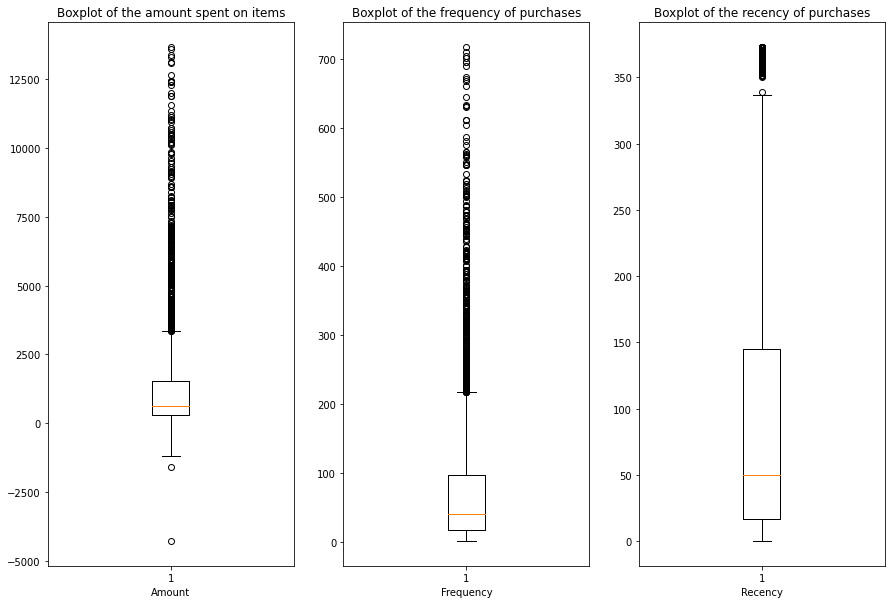

In [23]:
# Distributions after removing outliers
figure, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].boxplot(grouped_df['Amount'])
ax[0].set_title("Boxplot of the amount spent on items")
ax[0].set_xlabel("Amount")

ax[1].boxplot(grouped_df['Frequency'])
ax[1].set_title("Boxplot of the frequency of purchases")
ax[1].set_xlabel("Frequency")

ax[2].boxplot(grouped_df['Recency'])
ax[2].set_title("Boxplot of the recency of purchases")
ax[2].set_xlabel("Recency")

plt.show()

<br/>

In [24]:
# Z-score normalisation
rfm_df = grouped_df[['Amount', 'Frequency', 'Recency']].apply(StandardScaler)
rfm_df.to_csv('rfm.csv', index=False)
df = pd.read_csv('rfm.csv', header=0)
df.head()

,Amount,Frequency,Recency
0,-0.723654,-0.752800,2.301343
1,1.731416,1.042345,-0.906360
2,0.300093,-0.463582,-0.183637
3,0.277485,-0.044715,-0.738055
4,-0.533172,-0.603204,2.142938


In [332]:
rfm_df.to_csv?

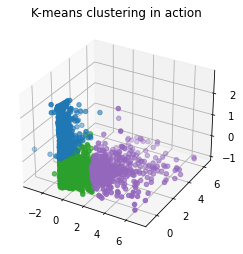

In [25]:
kMeans(rfm_df, 3)

<br/>

## Predictions

In [26]:
# predict clusters
clusters_numbers = []

for i in range(rfm_df.shape[0]):
    point = np.array(rfm_df.iloc[i])
    
    # get the cluster
    cluster_number = get_cluster_number(point)
    
    clusters_numbers.append(cluster_number)
    
rfm_df['cluster'] = clusters_numbers

In [27]:
rfm_df.head()

,Amount,Frequency,Recency,cluster
0,-0.723654,-0.752800,2.301343,1
1,1.731416,1.042345,-0.906360,3
2,0.300093,-0.463582,-0.183637,2
3,0.277485,-0.044715,-0.738055,2
4,-0.533172,-0.603204,2.142938,1


<br/>

## Evaluation of Clustering

In [28]:
# Silhouette Analysis
from sklearn.metrics import silhouette_score

silhouette_score(rfm_df, np.array(clusters_numbers))

0.5622199456617899

<br/>

## Assignment of real observations to clusters

In [31]:
grouped_df['cluster_id'] = rfm_df['cluster']

grouped_df.head()

,Customer,Amount,Frequency,Recency,cluster_id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,3
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,1


<br/>

## Within-cluster distributions

<AxesSubplot:xlabel='cluster_id', ylabel='Amount'>

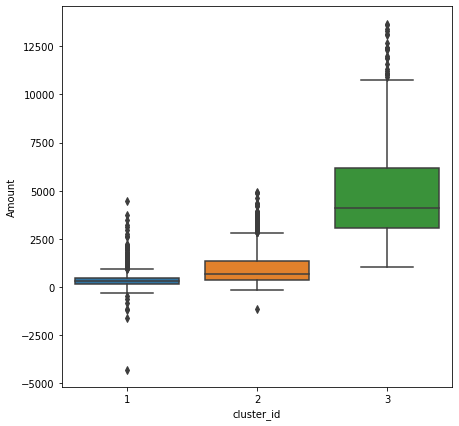

In [43]:
# The distribution in the clusters
fig = plt.figure(figsize=(7, 7))
sns.boxplot(x='cluster_id', y="Amount", data=grouped_df)

<AxesSubplot:xlabel='cluster_id', ylabel='Recency'>

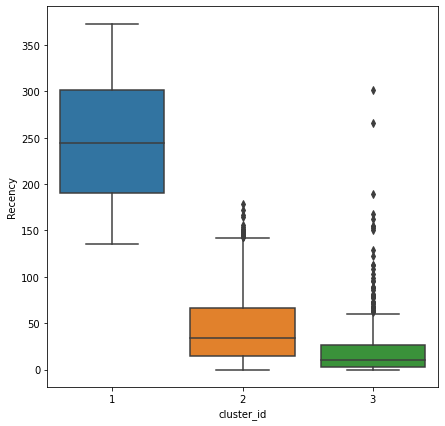

In [44]:
# The distribution in the clusters
fig = plt.figure(figsize=(7, 7))
sns.boxplot(x='cluster_id', y="Recency", data=grouped_df)

<AxesSubplot:xlabel='cluster_id', ylabel='Frequency'>

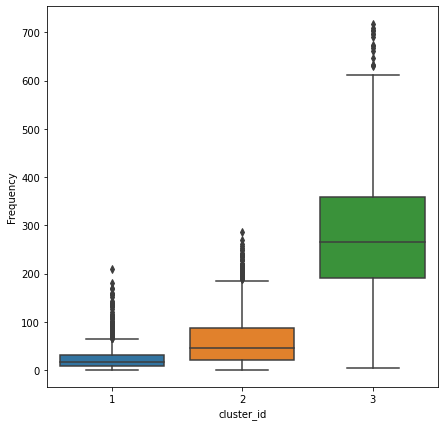

In [45]:
# The distribution in the clusters
fig = plt.figure(figsize=(7, 7))
sns.boxplot(x='cluster_id', y="Frequency", data=grouped_df)

In [36]:
# Number of customers in cluster 3
cluster_3 = grouped_df[grouped_df['cluster_id'] == 3]
cluster_3.shape

(499, 5)

In [37]:
# Number of customers in cluster 2
cluster_2 = grouped_df[grouped_df['cluster_id'] == 2]
cluster_2.shape

(2726, 5)

In [38]:
# Number of customers in cluster 1
cluster_1 = grouped_df[grouped_df['cluster_id'] == 1]
cluster_1.shape

(1068, 5)

In [39]:
sns.boxplot?

<br/>

<br/>